In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

In [2]:
airlines=pd.read_excel('Airlines+Data.xlsx')
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


### EDA

In [3]:
airlines.shape

(96, 2)

In [4]:
airlines.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [5]:
airlines.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
# no null entries

In [8]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [9]:
airlines2=pd.read_excel('Airlines+Data.xlsx',index_col=0,parse_dates=True)
airlines2

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


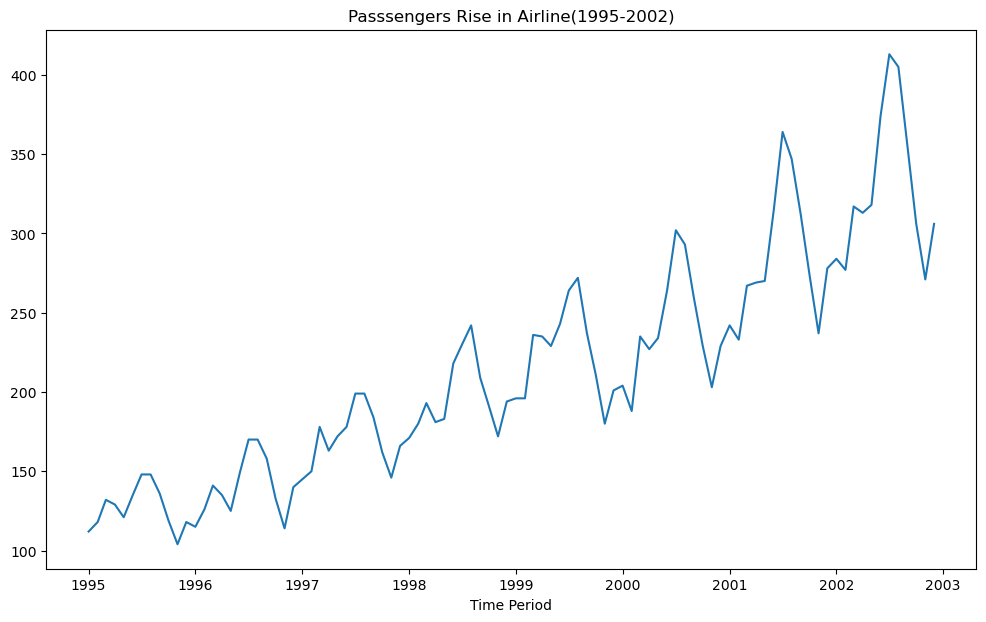

In [10]:
plt.figure(figsize=(12,7))
plt.plot(airlines2['Passengers'])
plt.title('Passsengers Rise in Airline(1995-2002)')
plt.xlabel('Time Period')
plt.show()

In [11]:
## above graph shows a clear picture of multiplivative seasonality in it

### splitting the data

In [12]:
train=airlines.head(90)
test=airlines.tail(16)

In [13]:
train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318


In [14]:
test

,Month,Passengers
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237
83,2001-12-01,278
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374


### Moving Average

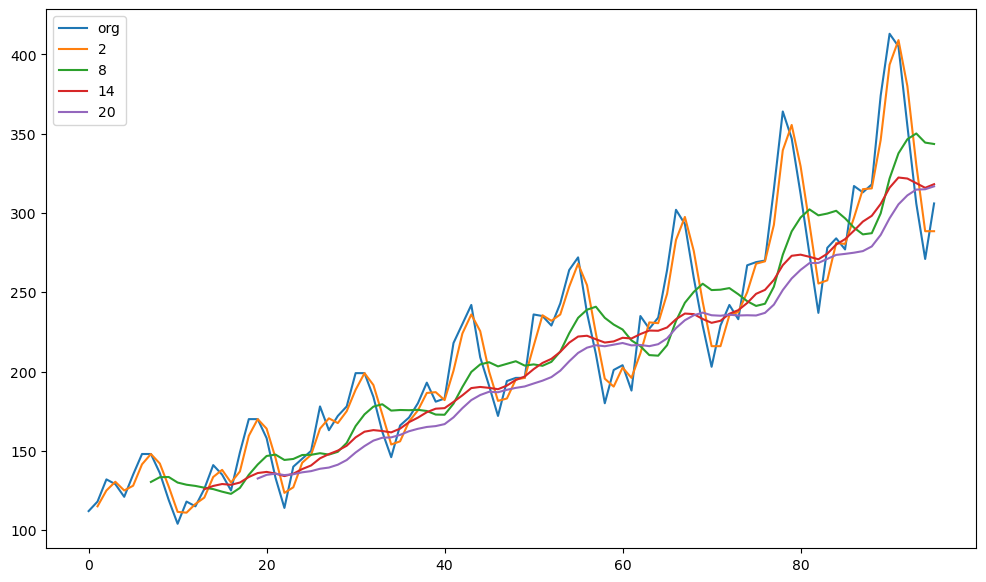

In [15]:
plt.figure(figsize=(12,7))
airlines.Passengers.plot(label='org')
for i in range(2,24,6):
    airlines['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

### Time series decomposition plot

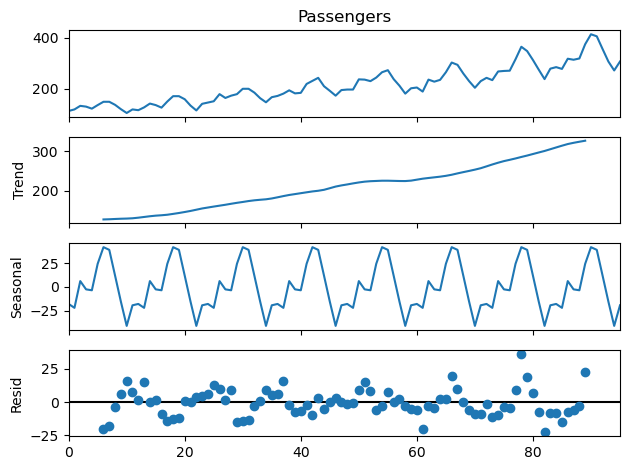

In [16]:
decompose=seasonal_decompose(airlines.Passengers,period=12)
decompose.plot()
plt.show()

### ACF plots and PACF plots

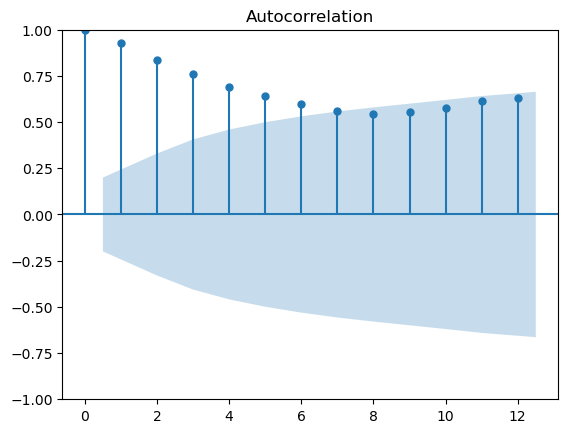

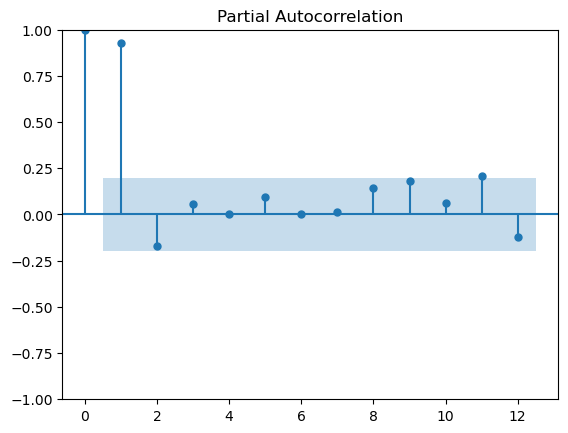

In [17]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines.Passengers,lags=12)
tsa_plots.plot_pacf(airlines.Passengers,lags=12)
plt.show()

### Evaluation Metrics RMSE

In [18]:
def RMSE(predictions,targets):
    squared_errors=(predictions-targets)**2
    mean_squared=np.mean(squared_errors)
    rmse=np.sqrt(mean_squared)
    return rmse

### Simple Exponential Method

In [19]:
se_model=SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2)
pred_ses=se_model.predict(start=test.index[0],end=test.index[-1])
RMSE(pred_ses,test.Passengers)

46.37442610706365

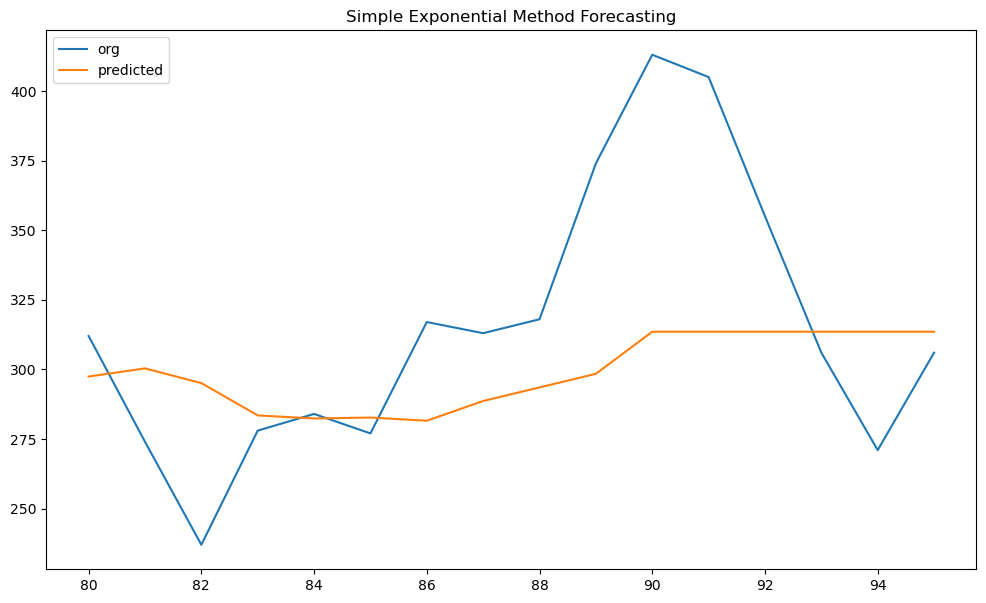

In [20]:
plt.figure(figsize=(12,7))
test.Passengers.plot(label='org')
pred_ses.plot(label='predicted')
plt.title('Simple Exponential Method Forecasting')
plt.legend(loc='upper left')
plt.show()

### Holt Method

In [21]:
hw_model=Holt(train['Passengers']).fit(smoothing_level=0.5,smoothing_trend=0.2)
pred_hw=hw_model.predict(start=test.index[0],end=test.index[-1])
RMSE(pred_hw,test.Passengers)

59.546505469548435

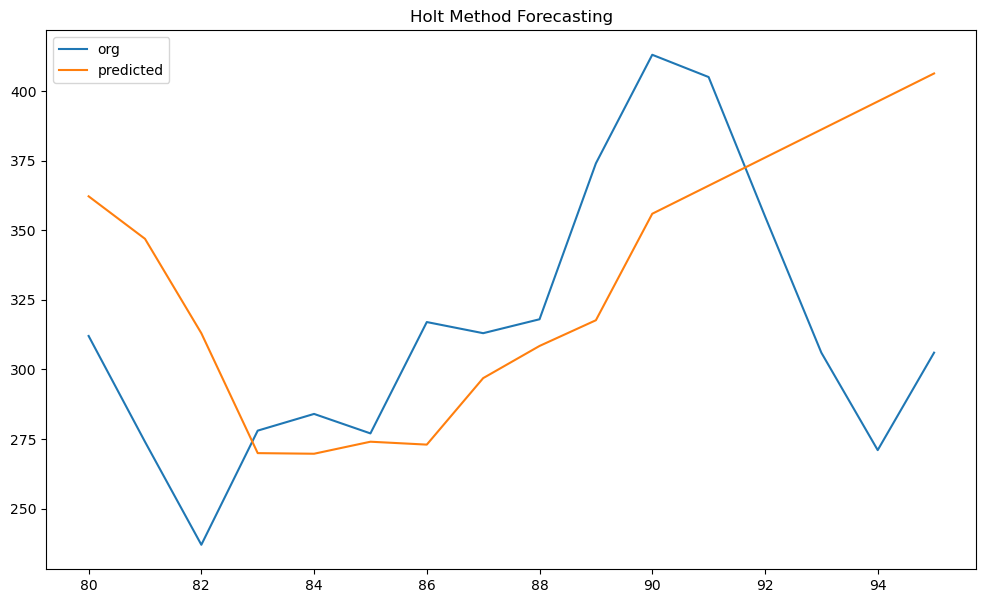

In [22]:
plt.figure(figsize=(12,7))
test.Passengers.plot(label='org')
pred_hw.plot(label='predicted')
plt.title('Holt Method Forecasting')
plt.legend(loc='upper left')
plt.show()

### Holts winter exponential smoothing with additive seasonality and additive trend

In [23]:
hwe_model_add=ExponentialSmoothing(train['Passengers'],seasonal='add',trend='add',seasonal_periods=12).fit(smoothing_level=0.6)
pred_hwe_add=hwe_model_add.predict(start=test.index[0],end=test.index[-1])
RMSE(pred_hwe_add,test.Passengers)

15.832687893051393

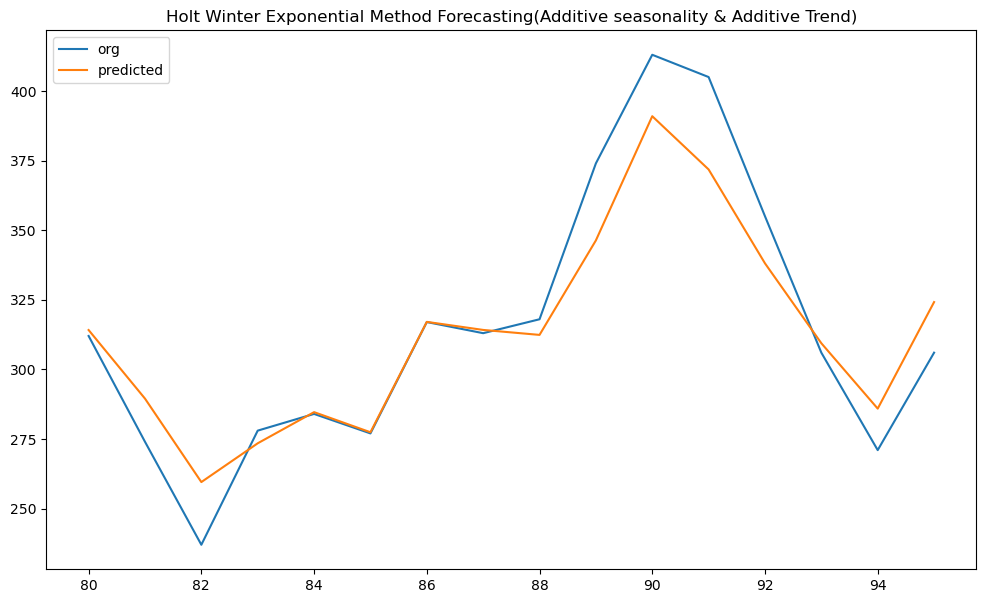

In [24]:
plt.figure(figsize=(12,7))
test.Passengers.plot(label='org')
pred_hwe_add.plot(label='predicted')
plt.title('Holt Winter Exponential Method Forecasting(Additive seasonality & Additive Trend)')
plt.legend(loc='upper left')
plt.show()

### Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend

In [25]:
hwe_model_mul2=ExponentialSmoothing(train['Passengers'],seasonal='mul',trend='mul',seasonal_periods=12).fit(smoothing_level=0.6)
pred_hwe_mul2=hwe_model_mul2.predict(start=test.index[0],end=test.index[-1])
RMSE(pred_hwe_mul2,test.Passengers)

7.785106308187272

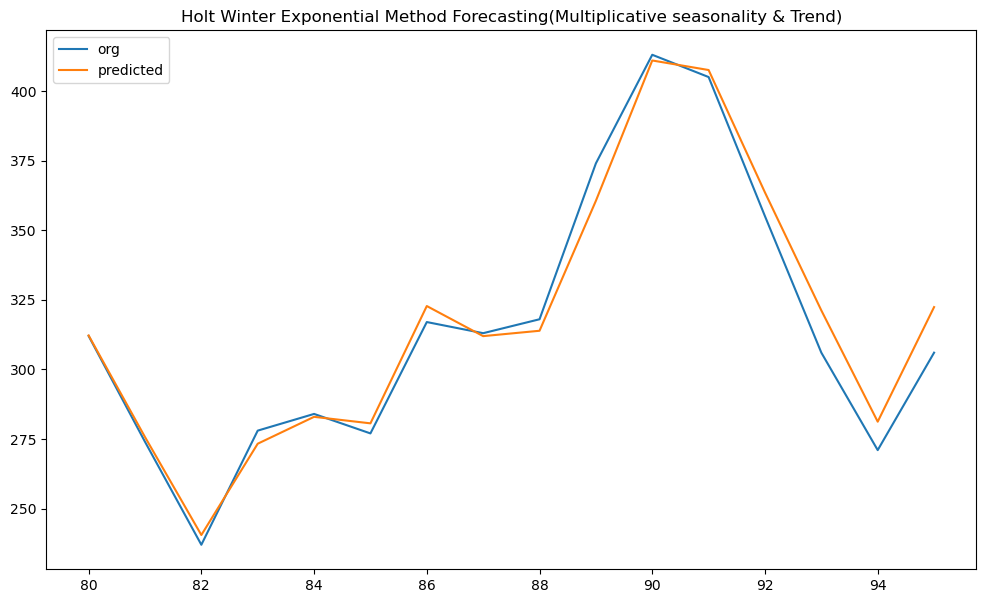

In [26]:
plt.figure(figsize=(12,7))
test.Passengers.plot(label='org')
pred_hwe_mul2.plot(label='predicted')
plt.title('Holt Winter Exponential Method Forecasting(Multiplicative seasonality & Trend)')
plt.legend(loc='upper left')
plt.show()

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [27]:
hwe_model_mul_add=ExponentialSmoothing(train['Passengers'],seasonal='mul',trend='add',seasonal_periods=12).fit(smoothing_level=0.6)
pred_hwe_mul_add=hwe_model_mul_add.predict(start=test.index[0],end=test.index[-1])
RMSE(pred_hwe_mul_add,test.Passengers)

5.612078695585192

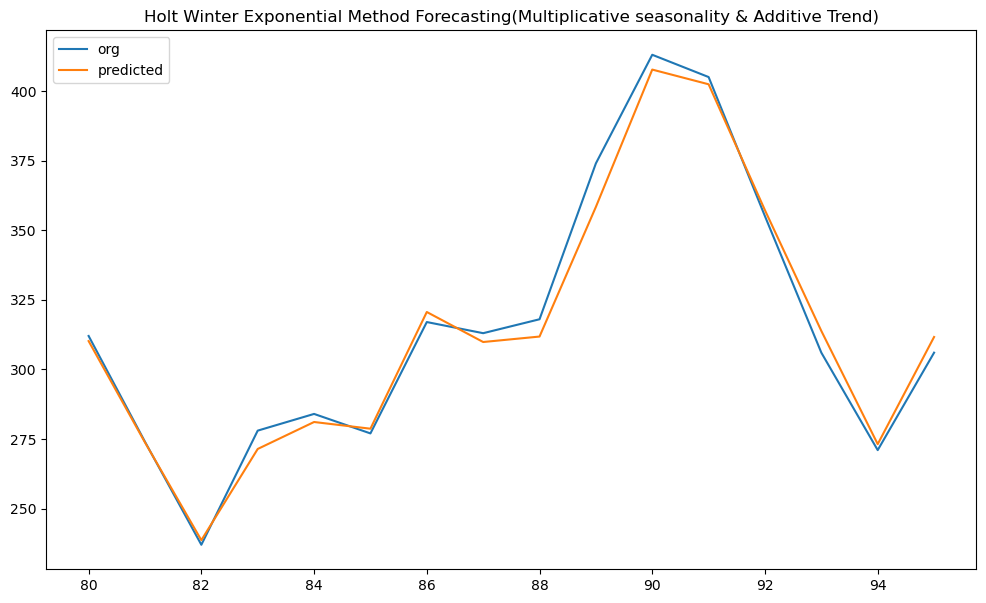

In [28]:
plt.figure(figsize=(12,7))
test.Passengers.plot(label='org')
pred_hwe_mul_add.plot(label='predicted')
plt.title('Holt Winter Exponential Method Forecasting(Multiplicative seasonality & Additive Trend)')
plt.legend(loc='upper left')
plt.show()

### Model based methods

In [29]:
airlines_df=airlines.copy()
airlines_df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [30]:
#adding extra columns month,year(extracted from feature 'Month')
from datetime import datetime as dt
airlines_df['month']=airlines_df.Month.dt.strftime('%b')
airlines_df['Year']=airlines_df.Month.dt.strftime('%Y')
airlines_df['t']=airlines_df.Month.dt.strftime('%m').astype(int) 
airlines_df

,Month,Passengers,month,Year,t
0,1995-01-01,112,Jan,1995,1
1,1995-02-01,118,Feb,1995,2
2,1995-03-01,132,Mar,1995,3
3,1995-04-01,129,Apr,1995,4
4,1995-05-01,121,May,1995,5
...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,8
92,2002-09-01,355,Sep,2002,9
93,2002-10-01,306,Oct,2002,10
94,2002-11-01,271,Nov,2002,11


In [31]:
#adding t square feature
airlines_df['t_square']=airlines_df['t'].apply(lambda x: x**2).astype(int)
airlines_df

,Month,Passengers,month,Year,t,t_square
0,1995-01-01,112,Jan,1995,1,1
1,1995-02-01,118,Feb,1995,2,4
2,1995-03-01,132,Mar,1995,3,9
3,1995-04-01,129,Apr,1995,4,16
4,1995-05-01,121,May,1995,5,25
...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,8,64
92,2002-09-01,355,Sep,2002,9,81
93,2002-10-01,306,Oct,2002,10,100
94,2002-11-01,271,Nov,2002,11,121


In [32]:
#adding log values column
from numpy import log
airlines_df['log_passengers']=airlines_df['Passengers'].apply(lambda x:log(x))
airlines_df

,Month,Passengers,month,Year,t,t_square,log_passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791
...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,8,64,6.003887
92,2002-09-01,355,Sep,2002,9,81,5.872118
93,2002-10-01,306,Oct,2002,10,100,5.723585
94,2002-11-01,271,Nov,2002,11,121,5.602119


In [33]:
#creating dummy columns and concatinating with orginal dataset
dummies=pd.DataFrame(pd.get_dummies(airlines_df['month']))
airlines_df=pd.concat([airlines_df,dummies],axis=1)
airlines_df

,Month,Passengers,month,Year,t,t_square,log_passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,8,64,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,9,81,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,10,100,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,11,121,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


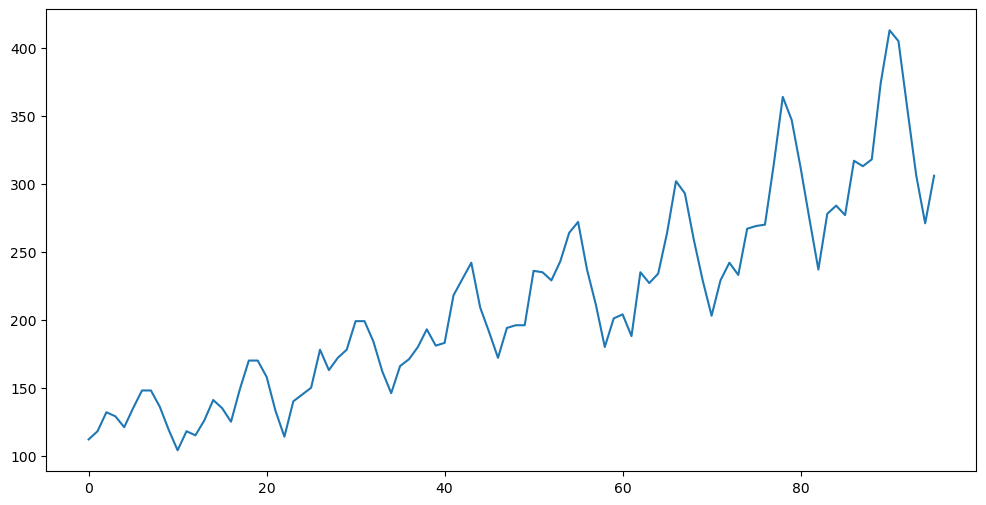

In [34]:
plt.figure(figsize=(12,6))
plt.plot(airlines_df['Passengers'])
plt.show()

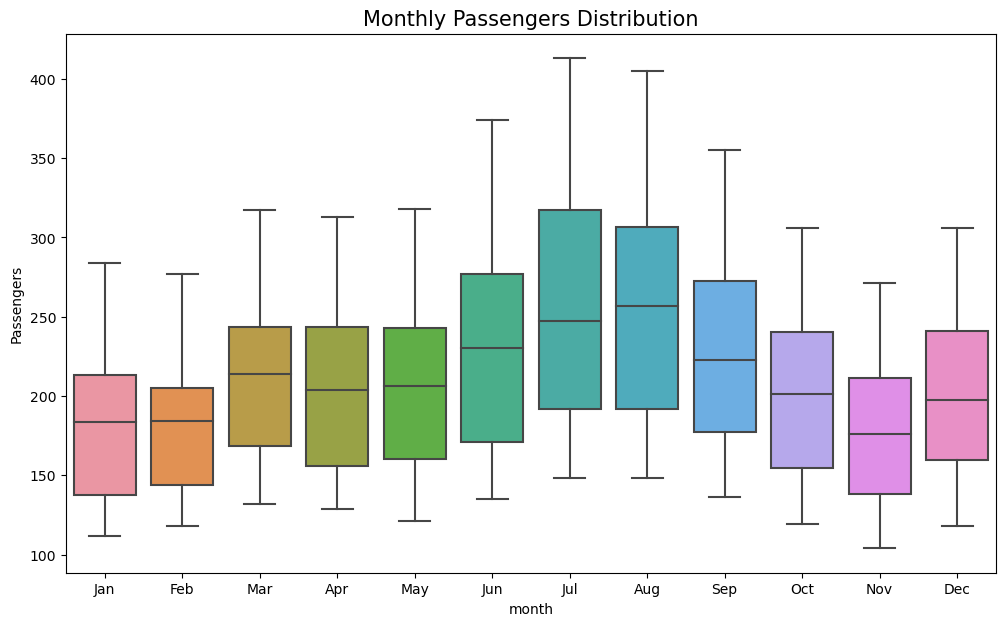

In [35]:
plt.figure(figsize=(12,7))
sns.boxplot(x='month',y='Passengers',data=airlines_df)
plt.title('Monthly Passengers Distribution',size=15)
plt.show()

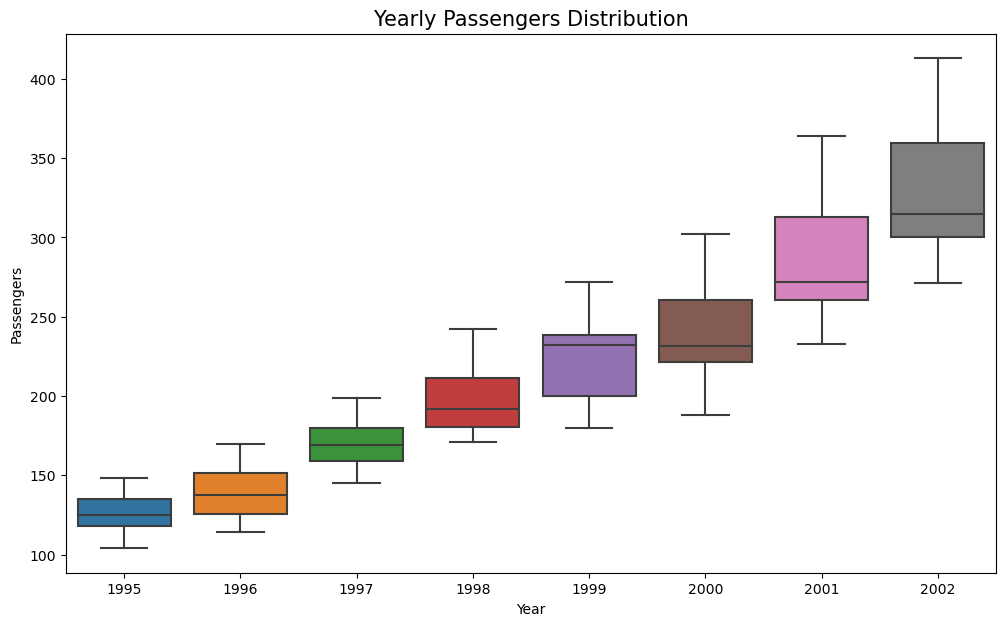

In [36]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Year',y='Passengers',data=airlines_df)
plt.title('Yearly Passengers Distribution',size=15)
plt.show()

In [37]:
#pivot table
yearly_monthwise_data=pd.pivot_table(data=airlines_df,values='Passengers',index='Year',columns='month')
yearly_monthwise_data

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


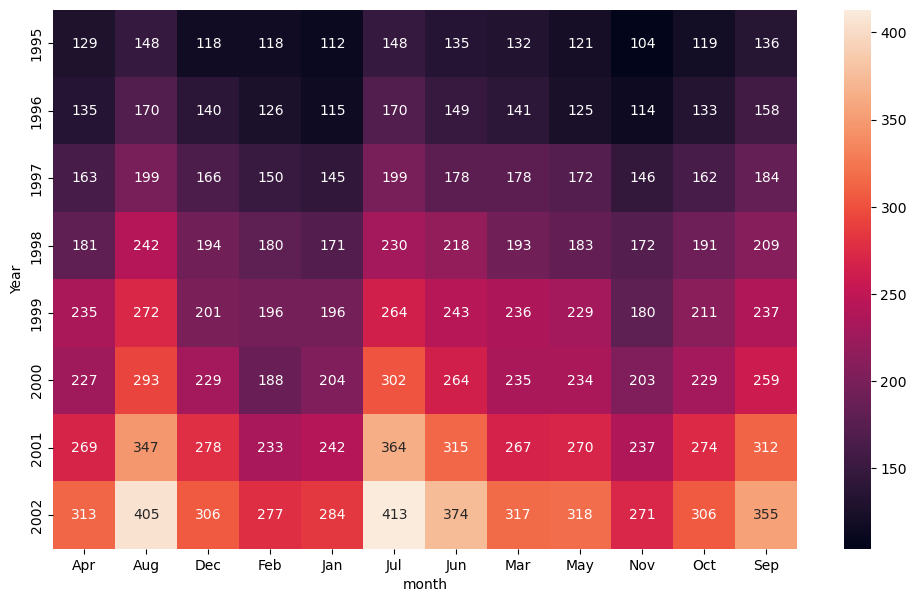

In [38]:
plt.figure(figsize=(12,7))
sns.heatmap(yearly_monthwise_data,annot=True,fmt='g')
plt.show()

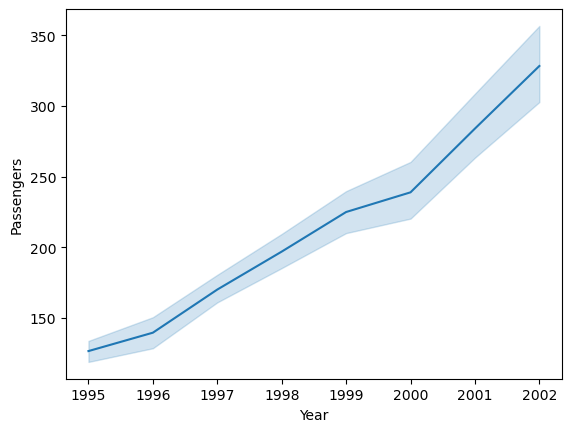

In [39]:
sns.lineplot(x='Year',y='Passengers',data=airlines_df)
plt.show()

### Splitting Data

In [40]:
train_df=airlines_df.head(90)
test_df=airlines_df.tail(16)

In [41]:
test_df

,Month,Passengers,month,Year,t,t_square,log_passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
80,2001-09-01,312,Sep,2001,9,81,5.743003,0,0,0,0,0,0,0,0,0,0,0,1
81,2001-10-01,274,Oct,2001,10,100,5.613128,0,0,0,0,0,0,0,0,0,0,1,0
82,2001-11-01,237,Nov,2001,11,121,5.468060,0,0,0,0,0,0,0,0,0,1,0,0
83,2001-12-01,278,Dec,2001,12,144,5.627621,0,0,1,0,0,0,0,0,0,0,0,0
84,2002-01-01,284,Jan,2002,1,1,5.648974,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,Feb,2002,2,4,5.624018,0,0,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,Mar,2002,3,9,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,Apr,2002,4,16,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,May,2002,5,25,5.762051,0,0,0,0,0,0,0,0,1,0,0,0
89,2002-06-01,374,Jun,2002,6,36,5.924256,0,0,0,0,0,0,1,0,0,0,0,0


In [42]:
train_df

,Month,Passengers,month,Year,t,t_square,log_passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2002-02-01,277,Feb,2002,2,4,5.624018,0,0,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,Mar,2002,3,9,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,Apr,2002,4,16,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,May,2002,5,25,5.762051,0,0,0,0,0,0,0,0,1,0,0,0


In [43]:
#Linear Model
import statsmodels.formula.api as smf

linear_model=smf.ols('Passengers~t',data=train_df).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test_df['t'])))
rmse_linear=RMSE(pred_linear,test_df.Passengers)
rmse_linear

120.0547688448704

In [44]:
#Exponential

Exp_model=smf.ols('log_passengers~t',data=train_df).fit()
pred_Exp=pd.Series(Exp_model.predict(pd.DataFrame(test_df['t'])))
rmse_Exp=RMSE(pred_Exp,test_df.Passengers)
rmse_Exp

313.38214869666547

In [45]:
#Quadratic

Quad=smf.ols('Passengers~t+t_square',data=train_df).fit()
pred_Quad=pd.Series(Quad.predict(test_df[['t','t_square']]))
rmse_quad=RMSE(pred_Quad,test_df.Passengers)
rmse_quad

118.62417141010036

In [46]:
#Additive Seasonality
add_sea=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_df).fit()
pred_add_sea=pd.Series(add_sea.predict(test_df[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea=RMSE(pred_add_sea,test_df.Passengers)
rmse_add_sea

117.09121810018992

In [47]:
#Additive Seasonality Quadratic
add_sea_quad=smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_df).fit()
pred_add_sea_quad=pd.Series(add_sea_quad.predict(test_df[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_square']]))
rmse_add_sea_quad=RMSE(pred_add_sea_quad,test_df.Passengers)
rmse_add_sea_quad

117.09121810022774

In [48]:
#Multiplicative Seasonality
mul_sea=smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_df).fit()
pred_mul_sea=pd.Series(mul_sea.predict(test_df))
rmse_mul_sea=RMSE(pred_mul_sea,test_df.Passengers)
rmse_mul_sea

313.38306068829047

In [49]:
#Multiplicative Additive Seasonality
mul_add_sea=smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_df).fit()
pred_mul_add_sea=pd.Series(mul_add_sea.predict(test_df))
rmse_mul_add_sea=RMSE(pred_mul_add_sea,test_df.Passengers)
rmse_mul_add_sea

313.38306068829047

In [50]:
data={'MODEL':pd.Series(['rmse_linear','rmse_Exp','rmse_quad','rmse_add_sea','rmse_add_sea_quad','rmse_mul_sea','rmse_mul_add_sea']),'RMSE_Values':pd.Series([rmse_linear,rmse_Exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,120.054769
1,rmse_Exp,313.382149
2,rmse_quad,118.624171
3,rmse_add_sea,117.091218
4,rmse_add_sea_quad,117.091218
5,rmse_mul_sea,313.383061
6,rmse_mul_add_sea,313.383061


###  Final Model by combining train and test data

In [51]:
hwe_model_mul_add=ExponentialSmoothing(airlines['Passengers'],seasonal='mul',trend='add',seasonal_periods=12).fit()

In [52]:
#Forecasting for next 12 time periods
hwe_model_mul_add.forecast(12)

96     312.899560
97     308.171547
98     355.533060
99     345.770145
100    345.696478
101    392.471215
102    436.501917
103    429.859801
104    380.173448
105    332.317859
106    290.626129
107    330.590939
dtype: float64

#### From using all datadriven and model based methods for forecasting,we came to a conclusion that Holt's winter method with multiplicative seasonality and additive trend gives very low RMSE value (5.61) compared to others

### So we can go with Holt's Winter Method